#Análise exploratória do preço de venda da gasolina e do etanol



---



### **1. Entendendo o negócio:** 


A Agência Nacional de Petróleo e Gás Natural e Biocombustíveis (ANP) é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural no Brasil, que:



*   mantém o Banco de Dados de Exploração e Produção (BDEP);
*   promove estudos sobre o potencial petrolífero e o desenvolvimento do
setor;
*   recebe e torna públicas as notificações *de* descobertas;
*   divulga as estatísticas oficiais sobre reservas, refino e produção de petróleo, gás e biocombustíveis no Brasil.

A ANP também realiza e divulga rotineiramente pesquisas sobre qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços desses produtos. Consolida e divulga informações sobre os mercados regulados e acerca dos investimentos em pesquisa, inovação e formação profissional voltadas para os setores regulados.



#### **1.1.Quais as perguntas a serem respondidas por esta análise?**

*   Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?
Qual o preço médio da gasolina e do etanol nesses dois meses?
*   Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
*   Qual o preço médio da gasolina e do etanol por estado?
*   Qual o município que possui o menor preço para a gasolina e para o etanol?
*   Qual o município que possui o maior preço para a gasolina e para o etanol?
*   Qual a região que possui o maior valor médio da gasolina?
*   Qual a região que possui o menor valor médio do etanol?
*   Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
*   Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?


### **2. Entendendo os Dados:**

Nesta etapa coletaremos os dados iniciais, descrevendo os referidos dados, bem como explorando-os com as estatísticas descritivas.

#### **2.1.Coletando os dados iniciais**

As fontes de dados que serão utilizadas no projeto estão disponíveis no portal dados.gov. 

Serão utilizados os arquivos dos meses de junho e julho de 2021 contendo a série histórica dos preços das gasolinas e do etanol em todo o Brasil.

In [ ]:
#Carregando os pacotes Python necessários para a execução dos códigos do projeto
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import plotly.express as px
import seaborn as sns
from datetime import datetime


In [ ]:
# Carregando o dataset com informações da ANP

df_junho = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv', sep=';')
df_julho = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv', sep=';')

#### **2.2. Descrevendo os dados**

Descrição dos dados de acordo com o formato, tipos de variáveis (numéricas ou categóricas), bem como aspectos gerais úteis ao entendimento geral do problema.

In [ ]:
print(f"Tamanho do dataframe de junho: {df_junho.shape[0]} linhas e {df_junho.shape[1]} colunas.\n"
      f"Tamanho do dataframe de julho: {df_julho.shape[0]} linhas e {df_julho.shape[1]} colunas.\n")

Tamanho do dataframe de junho: 49737 linhas e 16 colunas.
Tamanho do dataframe de julho: 47849 linhas e 16 colunas.



Podemos ver que o DataFrame do mês de junho possui 49737 linhas e o de julho 47849. Ambos têm 16 colunas cada. Também é possível verificar que os tipos das variáveis que integram o dataset são float e objeto. Tal análise serve para nos apontar a necessidade de transformações de tipo para melhorar aplicação de técnicas de Data Science. De cara, percebemos que a coluna 'Valor de Venda' está com o tipo objeto, mesmo sendo de valores numéricos. Isso precisará ser resolvido. 

In [ ]:
# Conhecendo as varíaveis e seus tipos.

display(df_junho.dtypes)

Região - Sigla        object
Estado - Sigla        object
Município             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Número Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

In [ ]:
display(df_julho.dtypes)

Região - Sigla        object
Estado - Sigla        object
Município             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Número Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

**Dicionário das variáveis**

As variáveis são as mesmas em ambos os datasets:

* `Região - Sigla` - região do país em que o posto de combustíveis está localizado
* `Estado - Sigla` - estado do país em que o posto de combustíveis está localizado
* `Município` - Município em que o posto de combustíveis está localizado
* `Revenda` - Nome do posto de combustíveis
* `Nome da Rua` - Rua do endereço do posto de combustíveis
* `Número da rua` - Número da rua em que está localizado o posto de combustíveis
* `Complemento` - Complemento do endereço do posto de combustíveis
* `Bairro` - Bairro do endereço do posto de combustíveis
* `Cep` - Código Postal do endereço do posto de combustíveis
* `Produto` - Tipo do combustível vendido
* `Data da Coleta` - Data em que o preço foi registrado
* `Valor de Venda` - Preço com o qual o combustível foi vendido
* `Valor de Compra ` - Coluna sem valores válidos
* `Unidade de Medida` - Unidade usada para o preço
* `Bandeira` - Nome da rede ao qual o posto de combustível faz parte

Por causa da similaridade entre os datasets e por se tratarem dos dados de dois meses sequenciais, decidimos unir as tabelas referentes aos meses de junho e julho e tratá-las como uma única tabela, usando a função [pd.concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html?highlight=concat#pandas.concat) para fazer a união.

In [ ]:
df_unico = pd.concat([df_junho, df_julho], ignore_index=True)

In [ ]:
print(f"Tamanho dos dois dataframes concatenados: {df_unico.shape[0]} linhas e {df_unico.shape[1]} colunas")

Tamanho dos dois dataframes concatenados: 97586 linhas e 16 colunas


Com isso, o novo número de linhas do dataframe passou a ser 97586. As colunas se mativeram as mesmas 16. Abaixo, podemos ver uma amostra dos dados. 

In [ ]:
df_unico.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA ADITIVADA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,ETANOL,01/06/2021,"6,1",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,01/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,BRANCA


#### **2.3.Tratamento**

Antes de partirmos para as estatísticas descritivas precisaremos fazer alguns tratamentos nos dados para corrigir as colunas que estão com o tipo errado: 'Valor de Venda', que está com o tipo objeto e precisa ser float, e 'Data da Coleta', que está com o tipo objeto e precisa ser Datetime.  

In [ ]:
df_unico['Valor de Venda'].head(5)

0    6,89
1    6,89
2     6,1
3    6,89
4    6,89
Name: Valor de Venda, dtype: object

Ao olharmos as primeiras linhas da coluna 'Valor de Venda' percebemos que os valores estão usando vírgulas para separar a casa decimal. O padrão da linguagem é o ".", então, antes de mudarmos o tipo, precisamos realizar essa correção.

In [ ]:
#código para substituit as vírgulas por pontos
df_unico['Valor de Venda'] = df_unico['Valor de Venda'].str.replace(',', '.')

#código para mudar o tipo de objeto para float
df_unico['Valor de Venda'] = pd.to_numeric(df_unico['Valor de Venda'])

Com essas mudanças, a coluna fica no formato ideal.

In [ ]:
df_unico['Valor de Venda'].head(5)

0    6.89
1    6.89
2    6.10
3    6.89
4    6.89
Name: Valor de Venda, dtype: float64

Ao olharmos as primeiras linhas da coluna 'Data da coleta', percebemos que os valores não estão no formato de data.

In [ ]:
df_unico['Data da Coleta'].head(5)

0    02/06/2021
1    02/06/2021
2    01/06/2021
3    01/06/2021
4    02/06/2021
Name: Data da Coleta, dtype: object

In [ ]:
#código para mudar o tipo da coluna 'Data da coleta' de objeto para datetime.
df_unico['Data da Coleta'] = pd.to_datetime(df_unico['Data da Coleta'], format='%d/%m/%Y')

Agora, as datas estão no formato que gostaríamos. 

In [ ]:
df_unico['Data da Coleta'].head(5)

0   2021-06-02
1   2021-06-02
2   2021-06-01
3   2021-06-01
4   2021-06-02
Name: Data da Coleta, dtype: datetime64[ns]

#### **2.4.Estatísticas Descritivas**

Agora que já conhecemos os nossos dados e deixamos o data frame com os tipos que precisamos, passamos para etapa de identificação da qualidade de nossos dados, por meio da aplicação de técnicas de estatística descritiva, com especial atenção para identificação de valores faltantes e presença de outliers. Primeiramente, usamos a função [.info()](https://) para obter informações preliminares sobre o dataframe.

In [ ]:
#Informações sobre o dataset, incluindo colunas que possuem dados faltantes
df_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97586 entries, 0 to 97585
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Região - Sigla     97586 non-null  object        
 1   Estado - Sigla     97586 non-null  object        
 2   Município          97586 non-null  object        
 3   Revenda            97586 non-null  object        
 4   CNPJ da Revenda    97586 non-null  object        
 5   Nome da Rua        97586 non-null  object        
 6   Número Rua         97529 non-null  object        
 7   Complemento        19711 non-null  object        
 8   Bairro             97327 non-null  object        
 9   Cep                97586 non-null  object        
 10  Produto            97586 non-null  object        
 11  Data da Coleta     97586 non-null  datetime64[ns]
 12  Valor de Venda     97586 non-null  float64       
 13  Valor de Compra    0 non-null      float64       
 14  Unidad

**Quanto à questão de dados faltantes, podemos identificar que:**

* A coluna **`Valor de Compra`** não possui nenhum dado válido. 
* A coluna **`Complemento`** possui a maioria de dados nulos
* A coluna **`Número Rua`** possui alguns poucos dados nulos

Para verificar a presença de outliers na coluna 'Valor de Venda' usaremos dois gráficos, o boxplot e o histograma.

In [ ]:
#código que cria um boxplot da coluna valor de venda
px.histogram(
    df_unico,
    'Valor de Venda',
    color='Produto',
    nbins=80,
    opacity = 0.6,
    barmode='overlay',
    histnorm='percent',
    marginal='box',
    height=1000
)

**Quanto à questão da presença de outliers, em uma rápida análise podemos identificar que:** 

Pela análise do histograma e dos boxplot, é possível verificar que há alguma presença de *outliers*. No caso das gasolinas, há tanto valores consideravelmente maiores e quanto consideravelmente menores, embora esse últimos aparecem menos. No caso do Etanol, há apenas valores consideravelmente maiores.

Para analisar o impacto desses outliers nos dados, vamos investigar o resumo estatístico do dataset:

In [ ]:
df_unico.describe()

,Valor de Venda,Valor de Compra
count,97586.000000,0.0
mean,5.384929,NaN
std,0.715136,NaN
min,3.097000,NaN
25%,4.990000,NaN
50%,5.550000,NaN
75%,5.899000,NaN
max,7.097000,NaN


**Quanto ao resumo das estatísticas, das variáveis numéricas do dataset, podemos verificar que:**

* A variável **`Valor de venda`** possui a média compatível com o valor que está na metade (50%) do total de seus valores
* O desvio padrão (std) da mesma variável não chega a 1, o que indica que a distância dos valores para a média é muito pequena
*   O valor que representa os 75% da coluna é pouco maior que o dos 50%, indicando que uma grande presença de valores com pouca variação de preço

Ambos os exemplos indicam que a média não é um valor impreciso no caso estudado. Mas para reforçarmos essa hipótese ainda mais, podemos calcular a mediana da variável **`Valor de venda`**:

In [ ]:
#cálculo da mediana da coluna 'Valor de Venda'
df_unico['Valor de Venda'].median()

5.55

**Quanto ao cálculo da mediana podemos verificar que:**

O valor da mediana difere muito pouco da média, que é 5.384929, reforçando que os outiliers não tornam a média um dado impreciso

### **3. Análise os Dados:**


#### **3.1.Limpeza dos Dados**

Antes de partirmos para a análise em si, iremos ajustar mais um pouco o nosso dataset, tirando algumas colunas que não iremos usar e deletando colunas com valores nulos, caso da coluna 'Valor de Compra':

In [ ]:
#código para deletar a coluna 'Valor de Compra', que não possúi valores válidos
df_unico.drop(columns='Valor de Compra', inplace=True)

Certas colunas, como "Número Rua", "Complemento", "Nome da Rua", "Bairro" e "Unidade de medida" foram consideradas desnecessárias para os objetivos da nossa análise, portanto decidimos removê-las:

In [ ]:
#código para remover as colunas desnecessárias:
for column in ['Número Rua', 'Complemento', 'Nome da Rua', 'Bairro','Unidade de Medida']:
  df_unico.drop(columns=column, inplace=True)

Usamos novamente a função .info() para verificar como ficou o nosso dataset:

In [ ]:
df_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97586 entries, 0 to 97585
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Região - Sigla   97586 non-null  object        
 1   Estado - Sigla   97586 non-null  object        
 2   Município        97586 non-null  object        
 3   Revenda          97586 non-null  object        
 4   CNPJ da Revenda  97586 non-null  object        
 5   Cep              97586 non-null  object        
 6   Produto          97586 non-null  object        
 7   Data da Coleta   97586 non-null  datetime64[ns]
 8   Valor de Venda   97586 non-null  float64       
 9   Bandeira         97586 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 7.4+ MB


Para garantirmos que os dados das colunas 'Revenda' e 'CNPJ da Revenda' não tenham espaços em branco antes ou depois de seus dados, usaremos uma função para deletar esses espaços:

In [ ]:
# Retirar espaços no início e final de cada registro
for column in ['Revenda', 'CNPJ da Revenda']:
  df_unico[column] = df_unico[column].str.strip()

Para facilitar o trabalho, iremos renomear as colunas tirando os espaços e os acentos de seus nomes e colocando todas as palavras em caixa baixa.

In [ ]:
#códico para substitiur os caracteres indesejados e colocar todas os nomes das colunas em caixa baixa
for coluna in df_unico.columns:
  df_unico.rename(columns={
      coluna:coluna.replace(' - ', '_')
                   .replace(' ', '_')
                   .replace('ã','a')
                   .replace('í','i')
                   .lower()}, inplace=True)

Após a mudança, os novos nomes são os da lista abaixo:

In [ ]:
df_unico.columns

Index(['regiao_sigla', 'estado_sigla', 'municipio', 'revenda',
       'cnpj_da_revenda', 'cep', 'produto', 'data_da_coleta', 'valor_de_venda',
       'bandeira'],
      dtype='object')

Por fim, checamos se existe alguma linha duplicada em nosso dataframe:

In [ ]:
# Verificar se há duplicatas nos dataframes
print(f"Quantidade de duplicatas no dataframe: {df_junho.duplicated().values.sum()}")

Quantidade de duplicatas no dataframe: 0


#### **3.2.Respondendo as perguntas propostas**

Agora, finalmente, o nosso dataset está do jeito que julgamos ideal para tentarmos responder os questionamentos propostos nesse projeto. 

##### Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

Para responder esta pergunta, primeiro vamos verificar como foi o comportamento dos preços de cada um dos combustíveis do dataset ao longo do recorte temporal investigado, os meses de junho e julho de 2021. Assim, poderemos observar se houve alguma grande mudança no valor de venda desses combustíveis durante esse período. Para isso, agruparemos as colunas 'Data da coleta' e 'Produto' com a média dos valores de vend e faremos um gráfico. 

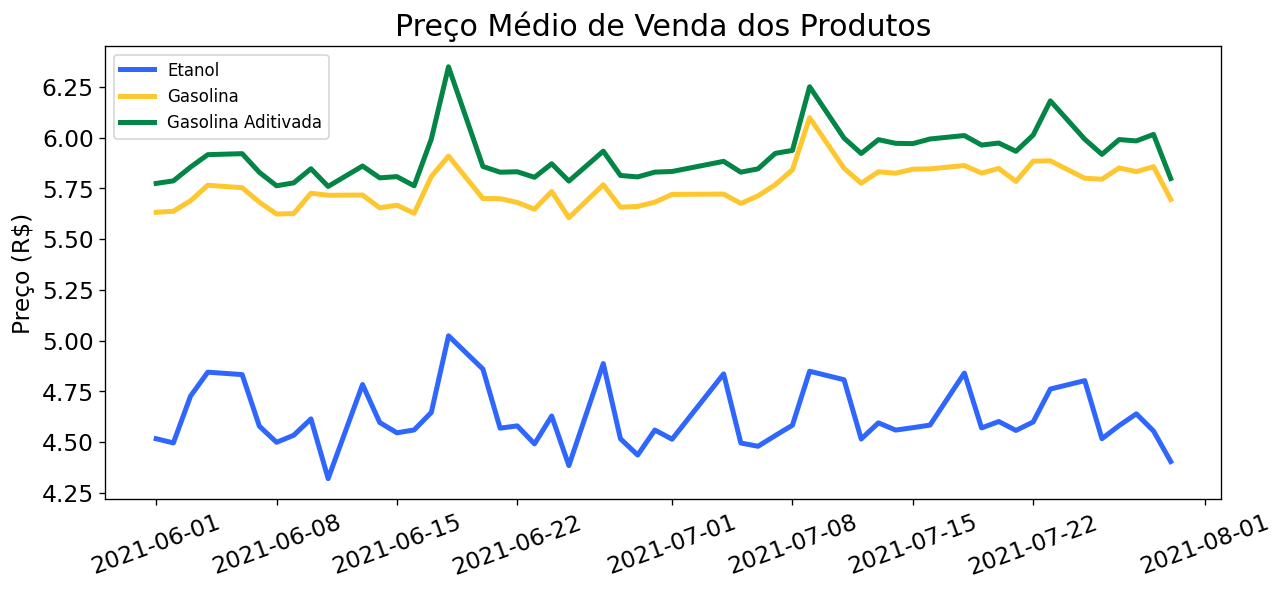

In [ ]:
#calculando a média dos valores de venda de cada conbumtível agrupadas pelas datas
df_medias_dia = df_unico.groupby(['data_da_coleta', 'produto'], as_index=False).mean()

#plotando um gráfico que mostra a distribuição dos preços do combustíveis ao longo das datas
plt.figure(figsize=(12,5), dpi=120)
plt.title('Preço Médio de Venda dos Produtos', fontsize=18)

plt.plot(
    df_medias_dia[df_medias_dia['produto'] == 'ETANOL']['data_da_coleta'],
    df_medias_dia[df_medias_dia['produto'] == 'ETANOL']['valor_de_venda'],
    label='Etanol',
    linewidth=3,
    color='#2f66fe')

plt.plot(
    df_medias_dia[df_medias_dia['produto'] == 'ETANOL']['data_da_coleta'], 
    df_medias_dia[df_medias_dia['produto'] == 'GASOLINA']['valor_de_venda'], 
    label='Gasolina',
    linewidth=3,
    color='#fec72f')

plt.plot(
    df_medias_dia[df_medias_dia['produto'] == 'ETANOL']['data_da_coleta'], 
    df_medias_dia[df_medias_dia['produto'] == 'GASOLINA ADITIVADA']['valor_de_venda'], 
    label='Gasolina Aditivada',
    linewidth=3,
    color='#038546')

plt.ylabel('Preço (R$)', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=20)
plt.legend()
plt.show()

Como podemos ver, ainda que o preço dos combustíveis varie durante o período investigado, essa variação é pequena para indicar uma tendência de queda no preço de cada um dos combustíveis. Na últimas datas do período, o gráfico mostra uma queda no preço, mas isso aconteceu outras vezes ao longo dos dois meses e, logo depois, os valores voltaram a subir. Portanto, não é suficiente para cravar que os preço estão caindo. 

Para compararmos o padrão dos preços de cada mês, vamos analisar as estatísticas descritivas de cada um dos combustíveis em junho e julho separadamente.

In [ ]:
#separando o dataframe com as médias do valores de venda dos combustíveis por dia entre os meses
media_junho = df_medias_dia[df_medias_dia["data_da_coleta"].isin(pd.date_range('2021-06-01', '2021-06-30'))]
media_julho = df_medias_dia[df_medias_dia["data_da_coleta"].isin(pd.date_range('2021-07-01', '2021-07-30'))]

In [ ]:
media_junho.groupby(['produto']).describe()

valor_de_venda            ...                   
                            count      mean  ...       75%      max
produto                                      ...                   
ETANOL                       26.0  4.616940  ...  4.707165  5.02400
GASOLINA                     26.0  5.695184  ...  5.724043  5.90925
GASOLINA ADITIVADA           26.0  5.852761  ...  5.859788  6.34900

[3 rows x 8 columns]

In [ ]:
media_julho.groupby(['produto']).describe()

valor_de_venda            ...                    
                            count      mean  ...       75%       max
produto                                      ...                    
ETANOL                       25.0  4.614430  ...  4.639709  4.849471
GASOLINA                     25.0  5.817361  ...  5.849151  6.098613
GASOLINA ADITIVADA           25.0  5.964916  ...  5.993429  6.250789

[3 rows x 8 columns]

Ao olharmos as estatísticas descritivas das médias dos valores de venda dos combustíveis em cada mês, podemos perceber que não houve tendência de queda dos preços de um mês por outro. O **Etanol** teve médias praticamente iguais nos dois meses, e preços mínimos mais altos em julho. Já a **Gasolina** teve médias, preços mínimos e preços máximos maiores em julho do que em junho. A **Gasolina aditivada** teve médias e preços mínimos maiores no segundo mês analisado.

##### Qual o preço médio da gasolina e do etanol nesses dois meses?

Para responder essa pergunta, vamos usar os dataframes criados para cada mês no exercício anterior. Em cada um deles, faremos um agrupamento da coluna produto com a média de nossos valores de venda. Começando por junho e seguindo para junho. 

In [ ]:
#agrupamento das médias de junho
media_junho.groupby(['produto']).mean()

,valor_de_venda
produto,
ETANOL,4.616940
GASOLINA,5.695184
GASOLINA ADITIVADA,5.852761


In [ ]:
#agrupamento das médias de julho
media_julho.groupby(['produto']).mean()

,valor_de_venda
produto,
ETANOL,4.614430
GASOLINA,5.817361
GASOLINA ADITIVADA,5.964916


Como podemos ver nas tabelas geradas, o preço médio da **gasolina** no mês de junho foi de **5,69 reais** e no mês de julho foi de **R$ 5,81**. Já o **Etanol** teve os preços médios de **4,61** reais em ambos os meses. As médias da Gasolina Aditivada foram 5,85 e 5,96 reais.

##### Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

Para verificarmos quais estados tiveram os preços médios mais caros para cada combustível precisamos, antes, criar uma tabela com os valores médios de cada combustível em cada estado:

In [ ]:
#código que agrupa os estados com as médias de cada produto. Usamos a função .unstack para exibir a tabela sem multindex
df_estado = df_unico.groupby(['estado_sigla', 'produto']).mean().unstack()
df_estado.head(5)

valor_de_venda                             
produto              ETANOL  GASOLINA GASOLINA ADITIVADA
estado_sigla                                            
AC                 5.535494  6.442674           6.424368
AL                 5.187422  5.958407           6.072673
AM                 4.450337  5.559481           5.580307
AP                 5.314000  4.986149           5.321176
BA                 4.941465  5.960797           6.053127

Com o agrupamento feito, cada coluna de combustível se comporta como uma série, então, bata ordená-las de forma descendente e fazer um corte das cinco primeiras colunas para sabermos os cinco estados com os maiores preços médios. 

In [ ]:
#estados com maiores preços médios do etanol
df_estado[('valor_de_venda', 'ETANOL')].sort_values(ascending =False).head(5)


estado_sigla
RS    5.806083
AC    5.535494
RN    5.524841
PA    5.333437
AP    5.314000
Name: (valor_de_venda, ETANOL), dtype: float64

In [ ]:
#estados com maiores preços médios para gasolina
df_estado[('valor_de_venda', 'GASOLINA')].sort_values(ascending =False).head(5)

estado_sigla
AC    6.442674
RJ    6.298844
RN    6.154723
PI    6.107937
GO    6.039623
Name: (valor_de_venda, GASOLINA), dtype: float64

In [ ]:
#estados com maiores preços médios para gasolina aditivada
df_estado[('valor_de_venda', 'GASOLINA ADITIVADA')].sort_values(ascending =False).head(5)

estado_sigla
AC    6.424368
RJ    6.417112
PI    6.309395
RN    6.210551
RS    6.145830
Name: (valor_de_venda, GASOLINA ADITIVADA), dtype: float64

Estados com maiores preços médios:

*   **Etanol:** RS, AC, RN, PA, AP
*   **Gasolina:** AC, RJ, RN, PI, GO
*   **Gasolina Aditivada:** AC, RJ, PI, RN, RS





##### Qual o preço médio da gasolina e do etanol por estado?



Todos os 26 estados da federação mais o Distrito Federal possuem valores de venda para os três combustíveis. 

In [ ]:
#criação de uma tabela pivot com os três tipos de combustivel como coluna e os estados como índice. 
#Os valores são as médias do valores de venda de cada combustível em cada estado.

tabela_media_estados = pd.pivot_table(df_unico, values='valor_de_venda', index=['estado_sigla'], columns=['produto'], aggfunc=np.mean)
tabela_media_estados

produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
estado_sigla,,,
AC,5.535494,6.442674,6.424368
AL,5.187422,5.958407,6.072673
AM,4.450337,5.559481,5.580307
AP,5.314000,4.986149,5.321176
BA,4.941465,5.960797,6.053127
CE,5.204020,5.807254,5.945513
DF,4.884223,5.854343,5.940984
ES,5.100665,5.863698,5.972921
GO,4.461115,6.039623,6.122082


In [ ]:
#Gráfico de barras mostrando as médias dos preços dos combustíveis em cada estado
df_media_estados = df_unico.groupby(['estado_sigla', 'produto'], as_index=False)[['valor_de_venda']].mean()
df_media_estados

fig = px.bar(
    data_frame=df_media_estados,
    x='estado_sigla',
    y='valor_de_venda',
    color='produto',
    height=1000,
    barmode='group',
    labels={'valor_de_venda': 'Valor de Venda',
            'estado_sigla': 'Estado',
            'produto': 'Produto'})

fig.update_layout(
    title_text = 'Média de Preço dos Produtos por Estado'
)

Pelas tabelas e pelo grádico, podemos afirmar que o **Amapá** é o único estado em que o Etanol é mais caro que a Gasolina. A maior diferença entre o preço da GASOLINA e do ETANOL acontece no estado do Mato Grosso, 1,7 reais. O menor preço médio do Etanol é encontrado no estado de **São Paulo** e o da gasolina é no **Amapá**. A Gasolina aditivada, na grande maioria dos estados, tem a média de preços levemente maior do que a gasolina comum. Com uma exeção, o estado do **Acre** em que sua média é 6,42 contra 6,44 da gasolina comum. 

##### Qual o município que possui o menor preço para a gasolina e para o etanol?

In [ ]:
#código que aponta o município com menor preço médio para cada combustível
for prod in ['GASOLINA ADITIVADA', 'GASOLINA', 'ETANOL']:
  d = df_unico[df_unico['produto'] == prod].reset_index(drop=True)
  municipio = d.iloc[d['valor_de_venda'].idxmin()]['municipio']
  preco = d.iloc[d['valor_de_venda'].idxmin()]['valor_de_venda']

  print(f'Município com o menor preço para {prod.title()}: {municipio.title()} - R${str(preco).replace("." , ",")}')

Município com o menor preço para Gasolina Aditivada: Cotia - R$4,199
Município com o menor preço para Gasolina: Sorriso - R$4,398
Município com o menor preço para Etanol: Santa Barbara D'Oeste - R$3,097


##### Qual o município que possui o maior preço para a gasolina e para o etanol?

In [ ]:
#código que aponta o município com maior preço médio para cada combustível
for prod in ['GASOLINA ADITIVADA', 'GASOLINA', 'ETANOL']:
  d = df_unico[df_unico['produto'] == prod].reset_index(drop=True)
  municipio = d.iloc[d['valor_de_venda'].idxmax()]['municipio']
  preco = d.iloc[d['valor_de_venda'].idxmax()]['valor_de_venda']

  print(f'Município com o maior preço para {prod.title()}: {municipio.title()} - R${str(preco).replace("." , ",")}')

Município com o maior preço para Gasolina Aditivada: Bage - R$7,097
Município com o maior preço para Gasolina: Bage - R$6,999
Município com o maior preço para Etanol: Pelotas - R$6,999


##### Qual a região que possui o maior valor médio da gasolina?

In [ ]:
#código que aponta as regiões com maior preço médio para as gasolinas
for prod in ['GASOLINA', 'GASOLINA ADITIVADA']:
  d = df_unico.groupby(['regiao_sigla', 'produto'], as_index=False).agg({'valor_de_venda':pd.Series.mean})
  valor_maximo =  d[d['produto'] == prod]['valor_de_venda'].max()
  regiao = d[d['valor_de_venda'] == valor_maximo]['regiao_sigla'].iloc[0]
  print(f'Região com o maior valor médio da {prod.title()}: {regiao} - R${str(round(valor_maximo, 3)).replace("." , ",")}')



Região com o maior valor médio da Gasolina: CO - R$5,902
Região com o maior valor médio da Gasolina Aditivada: NE - R$5,993


##### Qual a região que possui o menor valor médio do etanol?

In [ ]:
#código que aponta a região com menor preço médio para o etanol
d = df_unico.groupby(['regiao_sigla', 'produto'], as_index=False).agg({'valor_de_venda':pd.Series.mean})
valor_minimo =  d[d['produto'] == 'ETANOL']['valor_de_venda'].min()
regiao = d[d['valor_de_venda'] == valor_minimo]['regiao_sigla'].iloc[0]
print(f'Região com o menor valor médio do etanol: {regiao} - R${str(round(valor_minimo, 3)).replace("." , ",")}')

Região com o menor valor médio do etanol: SE - R$4,355


##### Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

Para respondermos essa pergunta, primeiro precisamos falar do conceito de correlação. A correlação é uma relação estatística entre duas variáveis, representada na linguagem pela função .corr(). Mas a correlação não pode ser aplicada na relação entre variáveis quantitativas e variáveis categóricas não binárias, o caso das variáveis 'Valor de Venda' e 'Região'. Desta forma, não poderemos afirmar que existe uma relação entre o preço dos combustíveis e a região em que eles foram vendidos através dessa fórmula matemática. Por isso, vamos analisar o comportamento dos preços em cada local para tentarmos identicar alguma tendência. Primeiro, vamos olhar a tabela das médias dos combustíveis para cada região:

In [ ]:
df_medias_regiao = df_unico.groupby(['regiao_sigla', 'produto'])[['valor_de_venda']].mean().unstack()
df_medias_regiao

valor_de_venda                             
produto              ETANOL  GASOLINA GASOLINA ADITIVADA
regiao_sigla                                            
CO                 4.406943  5.901902           5.989400
N                  5.046574  5.820873           5.949940
NE                 5.090050  5.856517           5.992951
S                  4.819885  5.705432           5.845881
SE                 4.354765  5.663083           5.826678

Para entender melhor o que esses valores representam, usaremos um gráfico:

In [ ]:
df_gafrico_regiao = df_unico.groupby(['regiao_sigla', 'produto'], as_index=False)[['valor_de_venda']].mean()

fig = px.line(df_gafrico_regiao, 
              x='regiao_sigla', 
              y='valor_de_venda', 
              color='produto', 
              markers=True,
              labels={'valor_de_venda': 'Valor de Venda',
            'regiao_sigla': 'Região',
            'produto': 'Produto'})
fig.show()

Como podemos observar, tanto na tabela quanto no gráfico, a média de preço da Gasolina varia muito pouco de uma região para a outra, com a região Sudeste tendo a menor média, e a região Centro-oeste, a maior. No entanto, o mesmo não acontece com o preço do Etanol. Para este combustível, os valores médios dos preços nas regiões sudeste e centro-oeste estão abaixo dos 4,50, um número significavamente menor do que os 5,09 da região Nordeste, a que tem o preço médio do Etanol mais caro. Assim, é possível identificar que os preços deste combustível tendem a ser menores nas regiões sudeste e centro-oeste.

##### Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

In [ ]:
df_valor_bandeira = df_unico.groupby(['bandeira', 'produto'], as_index=False).median().sort_values(['produto', 'valor_de_venda'], ascending=False)

In [ ]:
fig = px.bar(
    data_frame=df_valor_bandeira,
    x='valor_de_venda',
    y='bandeira',
    color='produto',
    height=1000,
    barmode='group',
    labels={'valor_de_venda': 'Valor de Venda',
            'bandeira': 'Bandeira',
            'produto': 'Produto'}
)

fig.update_layout(
    title_text = 'Mediana de Preço dos Produtos por Bandeira'
)


O preço dos combustíveis tende a ser mais caro ou barato dependendo da bandeira que o vende:

Gasolina:

&emsp;Menor preço R$5,27

&emsp;Maior preço R$6,24

&emsp;Diferença de **18.41%** entre a bandeira com a mediana mais barata e com a mais cara.
<hr>

Gasolina aditivada:

&emsp;Menor preço R$5,29

&emsp;Maior preço R$6,22

&emsp;Diferença de **17.58%** entre a bandeira com a mediana mais barata e com a mais cara.
<hr>

O etanol é o combustível com a maior diferença de preço entre as bandeiras.

Etanol:

&emsp;Menor preço R$3,999

&emsp;Maior preço R$5,799

&emsp;Diferença de **45.01%** entre a bandeira com a mediana mais barata e a mais cara.

#### **3.3.Propondo outras análises**


##### Como o valor total de vendas se comporta ao longo dos dias?

In [ ]:
df_total_vendas = df_unico.groupby('data_da_coleta', as_index=False).sum()
df_total_vendas['media_de_preco'] = df_unico.groupby('data_da_coleta', as_index=False).mean()['valor_de_venda']
df_total_vendas.head()

,data_da_coleta,valor_de_venda,media_de_preco
0,2021-06-01,13848.461,5.295779
1,2021-06-02,15550.672,5.287546
2,2021-06-03,4928.733,5.440103
3,2021-06-04,705.807,5.514117
4,2021-06-06,7380.841,5.471342


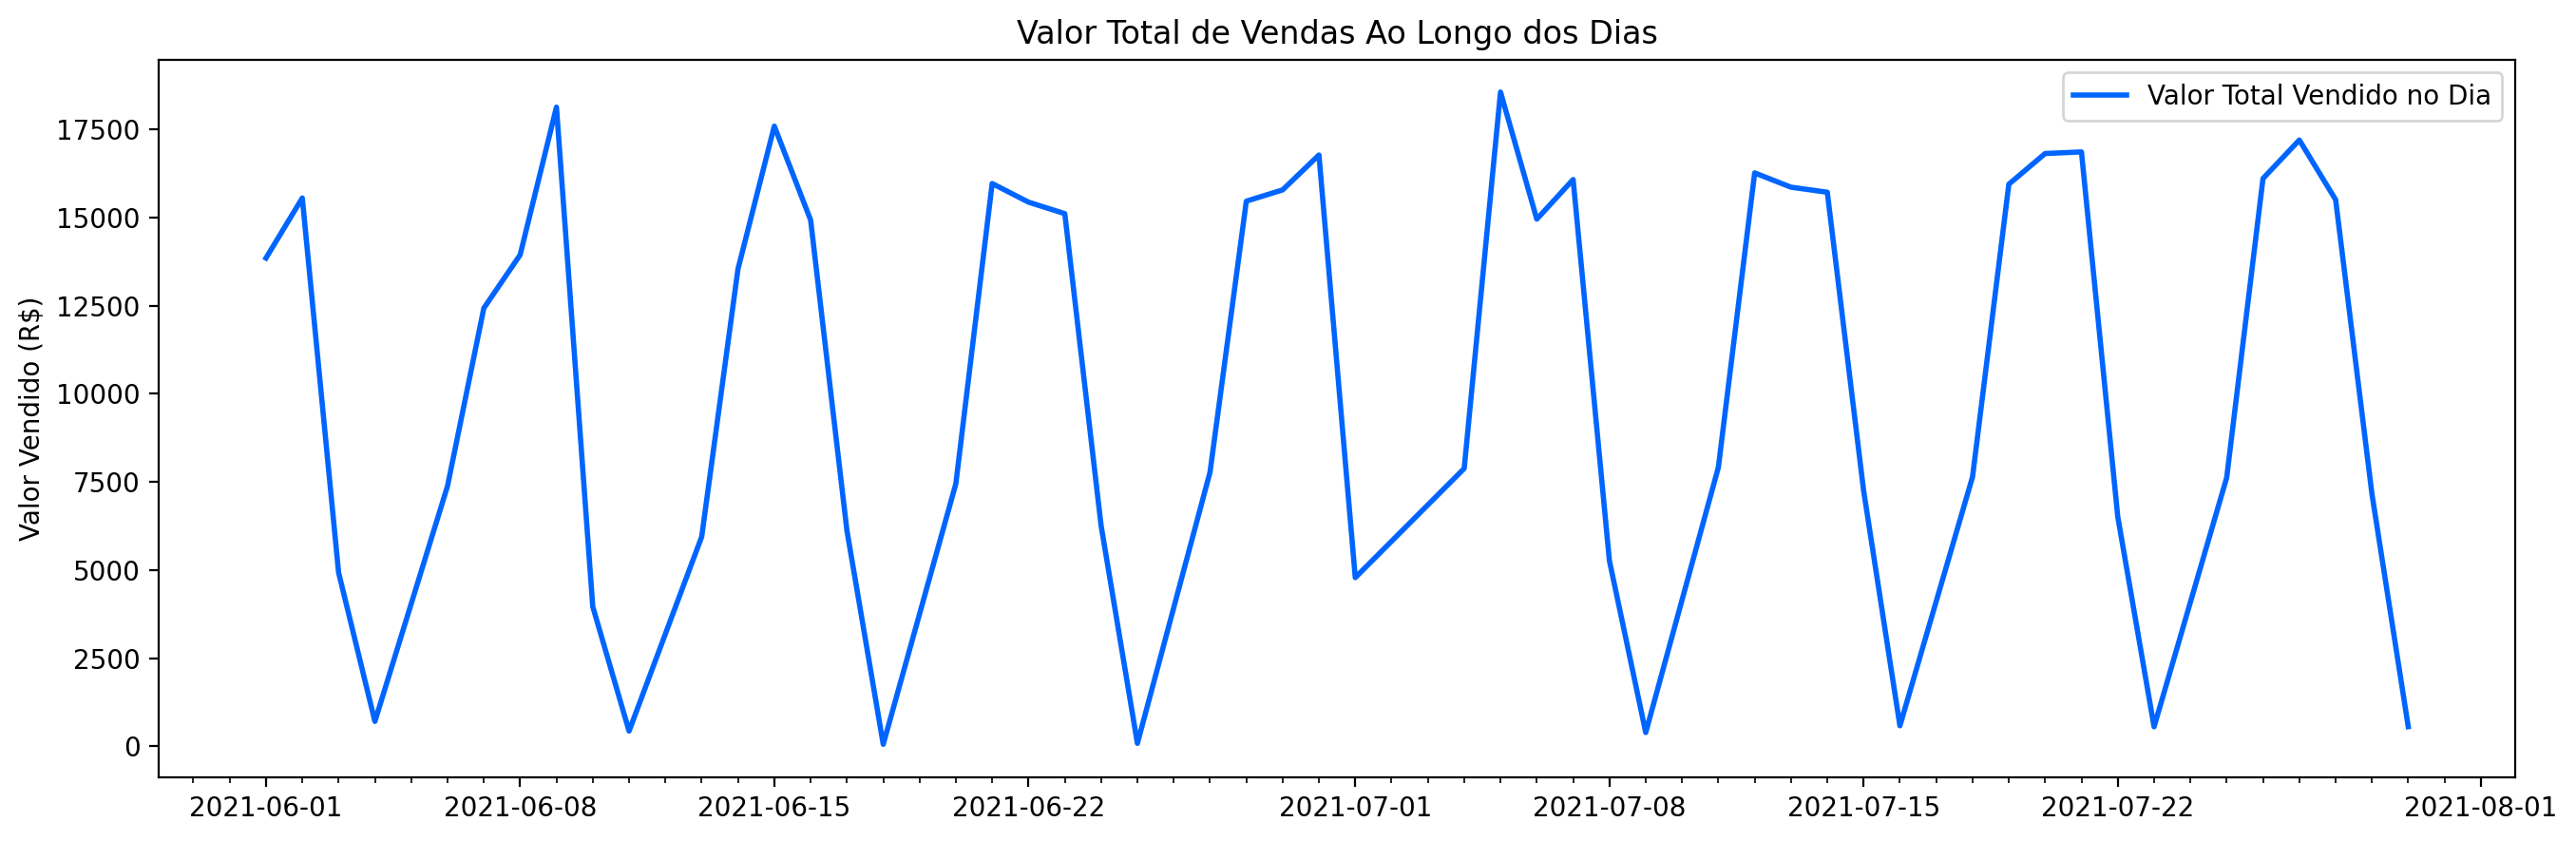

In [ ]:
m_meses = mdates.MonthLocator()
m_dias = mdates.DayLocator()

plt.figure(figsize=(16,5), dpi=200)
plt.title('Valor Total de Vendas Ao Longo dos Dias')

ax1 = plt.gca()

ax1.plot(
    df_total_vendas['data_da_coleta'],
    df_total_vendas['valor_de_venda'],
    linewidth=2,
    label='Valor Total Vendido no Dia',
    color='#0065fe',
)

ax1.xaxis.set_minor_locator(m_dias)

ax1.legend()
ax1.set_ylabel('Valor Vendido (R$)')

plt.show()

Foi observado um comportamento **cíclico** no total de vendas, onde certos dias vendem mais que outros. Que dias são esses?

In [ ]:
df_unico['dia_semana'] = df_unico['data_da_coleta'].apply(lambda x: x.weekday())
def adicionar_dia(n):
    dias = {
        0:'Domingo',
        1:'Segunda-Feira',
        2:'Terça-Feira',
        3:'Quarta-Feira',
        4:'Quinta-Feira',
        5:'Sexta-Feira',
        6:'Sábado'}
    return dias[n]

df_unico['dia_semana'] = df_unico['dia_semana'].apply(adicionar_dia)

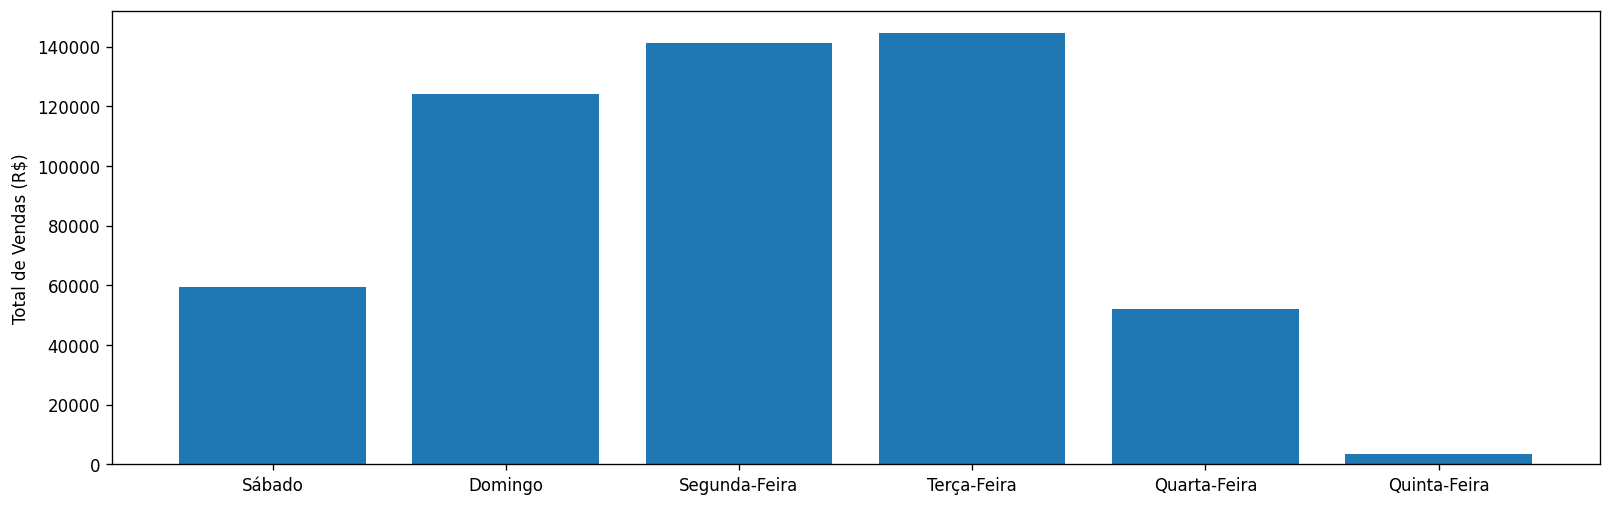

In [ ]:
df_total_vendas_por_dia = df_unico.groupby('dia_semana', as_index=False).sum().reindex([4,0,3,5,1,2])
plt.figure(figsize=(16,5), dpi=120)
plt.bar(
    df_total_vendas_por_dia['dia_semana'],
    df_total_vendas_por_dia['valor_de_venda']
)
plt.ylabel('Total de Vendas (R$)')
plt.show()

Aparentemente, as vendas começam a declinar nas quartas e quintas-feiras (não há registros para as sextas-feiras) e voltam a crescer a partir dos sábados. O que influencia esse ciclo? Será que há alguma correlação com a média dos preços dos produtos?

In [ ]:
corr = df_total_vendas.corr()
corr[['media_de_preco']].style.background_gradient(cmap='coolwarm')

,media_de_preco
valor_de_venda,-0.396647
media_de_preco,1.000000


A média dos preços não é o suficiente para explicar a natureza cíclica do total de vendas ao longo dos dias, porém, apesar de fraca, há uma correlação negativa, significando que a média de preço tende a ser mais alta quando o total de vendas é mais baixo, e vice-versa.

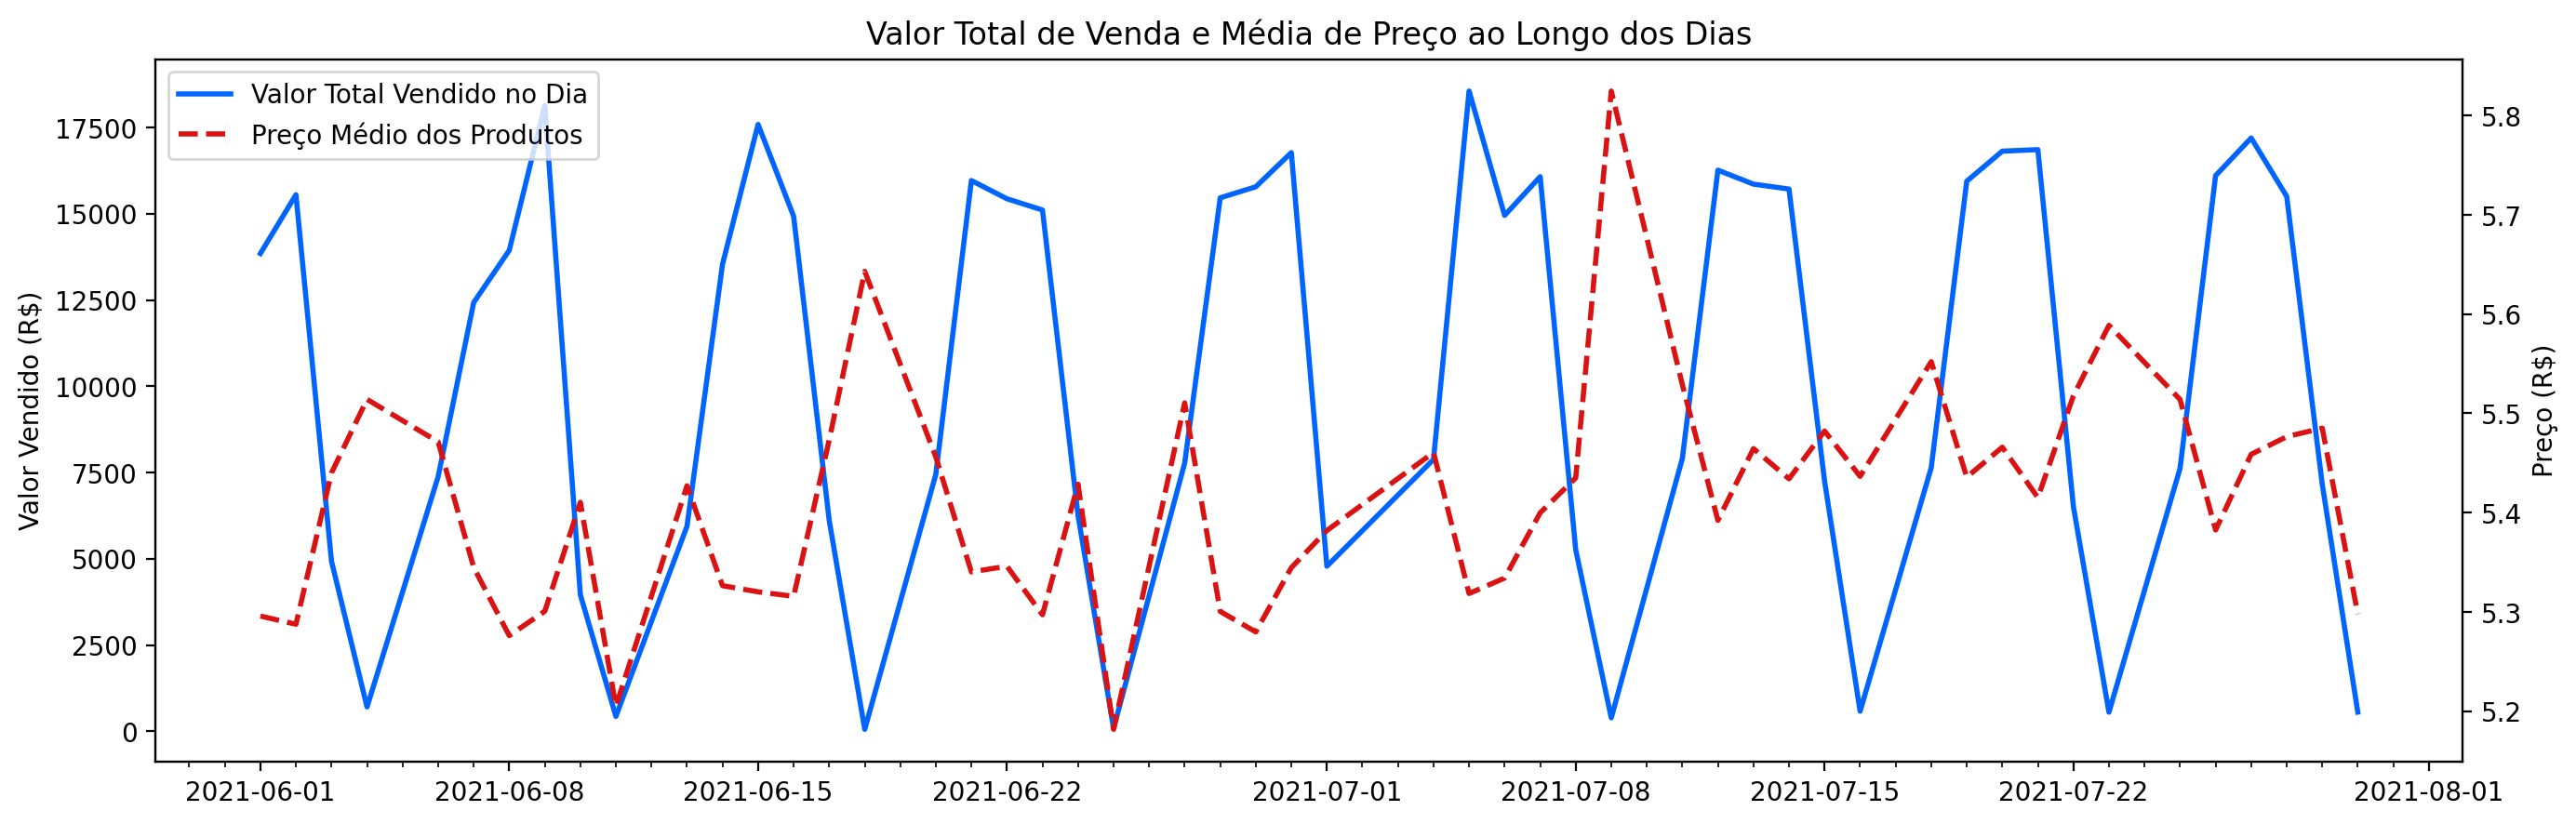

In [ ]:
plt.figure(figsize=(16,5), dpi=200)
plt.title('Valor Total de Venda e Média de Preço ao Longo dos Dias')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(m_meses)
ax1.xaxis.set_minor_locator(m_dias)

ax1.plot(
    df_total_vendas['data_da_coleta'],
    df_total_vendas['valor_de_venda'],
    linewidth=2,
    label='Valor Total Vendido no Dia',
    color='#0065fe',

)

ax2.plot(
    df_total_vendas['data_da_coleta'],
    df_total_vendas['media_de_preco'],
    color='#DA1212',
    linestyle='dashed',
    linewidth=2,
    label='Preço Médio dos Produtos',

)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
ax1.set_ylabel('Valor Vendido (R$)')
ax2.set_ylabel('Preço (R$)')
plt.show()

A média dos preços também possui uma natureza aparentemente cíclica. Será que há dias onde o preço dos produtos tende a ser mais caro ou mais barato em relação aos outros dias?

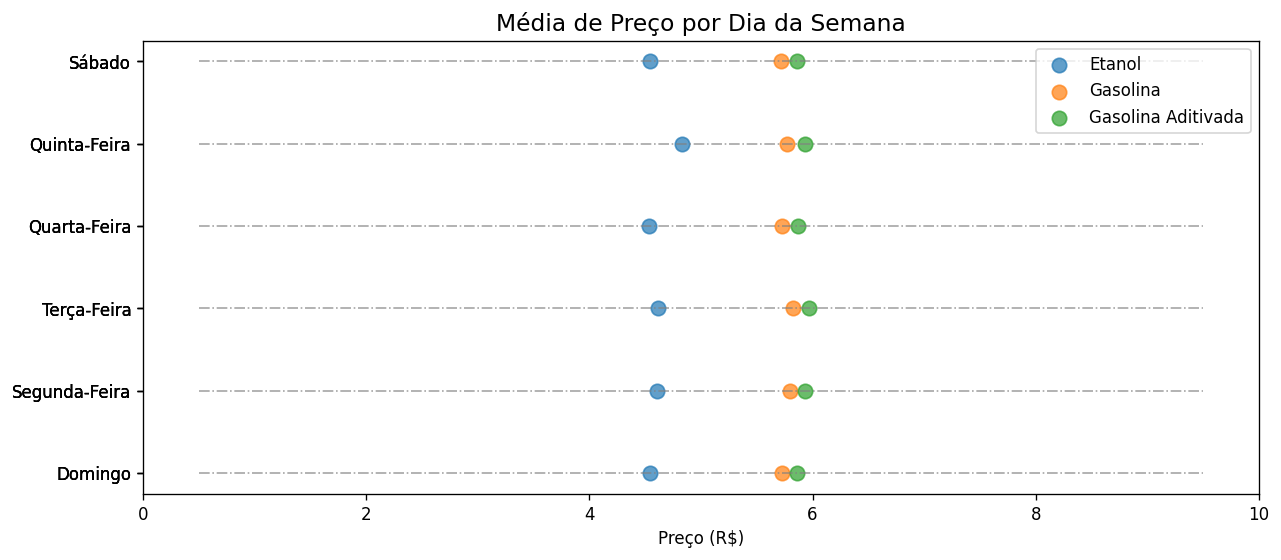

In [ ]:
dc = df_unico.groupby(['dia_semana', 'produto'], as_index=False).mean()
dias = ['Domingo', 'Segunda-Feira', 'Terça-Feira', 'Quarta-Feira',
        'Quinta-Feira', 'Sábado']


fig, ax = plt.subplots(figsize=(12, 5), dpi= 120)
ax.hlines(y=dc.index, xmin=0.5, xmax=9.5, color='gray', alpha=0.7, linewidth=1,
          linestyles='dashdot')
ax.scatter(
    y=dias,
    x=dc[dc['produto'].str.endswith('ETANOL')]['valor_de_venda'],
    s=75,  
    alpha=0.7, 
    label='Etanol')

plt.scatter(
    y=dias, 
    x=dc[dc['produto'].str.endswith('GASOLINA')]['valor_de_venda'], 
    s=75,  
    alpha=0.7, 
    label='Gasolina')

plt.scatter(
    y=dias, 
    x=dc[dc['produto'].str.endswith('GASOLINA ADITIVADA')]['valor_de_venda'], 
    s=75,  
    alpha=0.7, 
    label='Gasolina Aditivada')


ax.set_title('Média de Preço por Dia da Semana', fontdict={'size':14})
ax.set_xlabel('Preço (R$)')
ax.set_yticks(dc['dia_semana'])
ax.set_xlim(0, 10)

plt.legend()
plt.show()

Aparentemente o preço médio das gasolinas mantém-se no mesmo patamar nos diferentes dias da semana. O preço do etanol segue o mesmo padrão, com exceção de quinta-feira, onde o preço tem um leve aumento em relação aos demais.

##### Como é a distribuição dos postos entre as bandeiras?





Primeiro, vamos verificar o número total de postos que aparecem em nosso dataset

In [ ]:
df_unico['revenda'].nunique()

8449

Depois, vamos ver como esses postos se distribuem entre as bandeiras existentes:

In [ ]:
quantidade_bandeiras = df_unico.groupby('bandeira', as_index=False)[['revenda']].nunique().sort_values(by='revenda', ascending=False)
quantidade_bandeiras.head(15)

,bandeira,revenda
5,BRANCA,3320
22,PETROBRAS DISTRIBUIDORA S.A.,1775
16,IPIRANGA,1483
26,RAIZEN,1435
1,ALESAT,196
34,SABBÁ,98
30,RODOIL,40
27,RAIZEN MIME,30
3,ATEM' S,30
38,SP,30


In [ ]:
#código que cria um gŕafico das porcentagens de postos por bandeira
fig = px.pie(quantidade_bandeiras, values='revenda', names='bandeira', height=800)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Cabe ressaltar que a bandeira predominante no dataset, **Branca**, é o nome dado a um conjunto de postos que não estão ligados a nenhuma empresa e são independentes entre si. **38,1%** dos postos de nosso dataset se enquadram nessa categoria.
Na sequência, aparecem três grandes empresas do ramo dos combustíveis, **Petrobras, Ipiranga e Raizen**, dona dos postos Shell. Podemos ver que as três juntas detém **53,8%** dos postos de combustíveis do dataset. Portanto, se sormamos os postos de bandeira branca com os dessas três empresas, temos quase 91,9% do total do mercado. Sobrando uma fatia muito pequena para outras redes. 

##### Em que Municípios a diferença entre os preços máximos e mínimos é grande ao ponto de pesar no bolso do consumidor?

Queremos saber em quais municipios do país vale a pena o consumidor fazer uma pesquisa de preço antes de escolher em que posto abastecer porque a diferença entre os preços máximos e mínimos praticados chega a pesar no bolso. 

Para isso, começamos delimitando um intervalo de tempo pequeno. Pegamos a última semana de julho:

In [ ]:
#código que separa os dados apenas da última semana registrada em nosso dataset
recorte_julho = df_unico[df_unico["data_da_coleta"].isin(pd.date_range('2021-07-23', '2021-07-30'))]

Com o período definido, vamos agrupar os municípios com seus valores de venda máximos e mínimos para cada combustível. 

In [ ]:
recorte_maximos_minimos = recorte_julho.groupby(['municipio', 'produto'])[['valor_de_venda']].agg(['min', 'max']).unstack()

In [ ]:
recorte_maximos_minimos.head()

valor_de_venda           ...                            
                                 min           ...      max                   
produto                       ETANOL GASOLINA  ... GASOLINA GASOLINA ADITIVADA
municipio                                      ...                            
ABAETETUBA                     5.199    5.840  ...    6.000              6.200
ADAMANTINA                     3.940    5.470  ...    5.690              5.849
AGUAS LINDAS DE GOIAS          4.490    6.190  ...    6.199              6.249
ALEGRETE                       5.730    6.313  ...    6.399              6.599
ALENQUER                       6.140    6.500  ...    6.540              6.639

[5 rows x 6 columns]

Para facilitar a leitura, vamos renomenar as colunas da tabela.

In [ ]:
recorte_maximos_minimos.columns = ['ETANOL_MIN', 'GASOLINA_MIN','ADITIVADA_MIN','ETANOL_MAX', 'GASOLINA_MAX', 'ADITIVADA_MAX']

In [ ]:
recorte_maximos_minimos.head()

,ETANOL_MIN,GASOLINA_MIN,ADITIVADA_MIN,ETANOL_MAX,GASOLINA_MAX,ADITIVADA_MAX
municipio,,,,,,
ABAETETUBA,5.199,5.840,5.89,5.300,6.000,6.200
ADAMANTINA,3.940,5.470,5.79,3.990,5.690,5.849
AGUAS LINDAS DE GOIAS,4.490,6.190,6.19,4.599,6.199,6.249
ALEGRETE,5.730,6.313,6.44,5.999,6.399,6.599
ALENQUER,6.140,6.500,6.50,6.140,6.540,6.639


Assim, já podemos calcular a variação entre os preços máximos e mínimos dos combustíveis.

In [ ]:
#código que calcula a variação entre os preços máximos e mínimos do etanol e lista os 15 municípios com a maior variação
variacao_etanol = (recorte_maximos_minimos['ETANOL_MAX'] - recorte_maximos_minimos['ETANOL_MIN'])
variacao_etanol.sort_values(axis=0, ascending=False).head(15)

municipio
PELOTAS                        1.411
RIO DE JANEIRO                 1.378
NITEROI                        1.339
DUQUE DE CAXIAS                1.300
SAO GONCALO                    1.300
SAO FRANCISCO DE ITABAPOANA    1.209
SAO PAULO                      1.200
NOVA IGUACU                    1.200
JUAZEIRO DO NORTE              1.191
LONDRINA                       1.161
SANTOS                         1.120
ITATIBA                        1.110
MAFRA                          1.090
ARARUAMA                       1.090
PALHOCA                        1.060
dtype: float64

Para o combustível etanol, a maior variação entre os preços máximo e mínimo acontece no município do Pelotas e chega a R$1,41. Na sequência vem Rio de Janeiro e Niterói, com 1,37 e 1,33 reais. Esses valores num tanque de 50l somam cerca de 70 reais, ou seja, fazem muita diferença no bolso. 

In [ ]:
##código que calcula a variação entre os preços máximos e mínimos da gasolina e lista os 15 municípios com a maior variação
variacao_gasolina = (recorte_maximos_minimos['GASOLINA_MAX'] - recorte_maximos_minimos['GASOLINA_MIN'])
variacao_gasolina.sort_values(axis=0, ascending=False).head(15)

municipio
SAO PAULO             1.300
SANTO ANGELO          1.231
ITAPEVA               1.120
ARARAQUARA            1.100
DIADEMA               1.010
SANTO ANDRE           1.001
FEIRA DE SANTANA      1.000
OSASCO                0.970
RIO DE JANEIRO        0.940
ITU                   0.910
NITEROI               0.879
LONDRINA              0.871
CALDAS NOVAS          0.830
SAO CAETANO DO SUL    0.810
TABOAO DA SERRA       0.783
dtype: float64

Para o combustível Gasolina, a variação é um pouco menor. A maior delas, R$1,30, acontece no município de São Paulo. Na sequência vem Santo Angelo e Iatapeva. 

In [ ]:
##código que calcula a variação entre os preços máximos e mínimos da gasolina aditivada e lista os 15 municípios com a maior variação
variacao_gasolina_aditivada = (recorte_maximos_minimos['ADITIVADA_MAX'] - recorte_maximos_minimos['ADITIVADA_MIN'])
variacao_gasolina_aditivada.sort_values(axis=0, ascending=False).head(15)

municipio
SAO PAULO             2.000
BARRA MANSA           1.510
INDAIATUBA            1.400
MANAUS                1.300
MOGI MIRIM            1.295
CRICIUMA              1.190
DIADEMA               1.050
GUARUJA               1.040
LONDRINA              1.030
NITEROI               1.020
ITATIBA               1.010
ARARAQUARA            0.950
SAO CAETANO DO SUL    0.910
RIO DE JANEIRO        0.900
BRASILIA              0.860
dtype: float64

A gasolina aditivada é o combustível que apresnta a maior variação entre os preços mínimos e máximos. Em São Paulo, a diferença chega a 2 reais. Em Barra Mansa a variação é de R$1,50 e em Idaiatuba, de 1,40 reais. Num tanque cheio, esses valores representam uma diferença de quase cem reais. 

### **4. Conclusão**



*   Os preços médios da gasolina e do etanol nos meses de junho e julho de 2021 **não apresentaram uma tendência de queda**.
*   O preço médio da gasolina em junho foi de **5,69 reais** e no mês de julho foi de **R$ 5,81**. Já o Etanol teve os preços médios de **4,61 reais** em ambos os meses.
*   Os estados com os maiores preços médios para cada combustíveis são:
  *   **Etanol:** RS, AC, RN, PA, AP
  *   **Gasolina:** AC, RJ, RN, PI, GO
  *   **Gasolina Aditivada:** AC, RJ, PI, RN, RS
*   O **Amapá** é o único estado em que o Etanol é mais caro que a Gasolina. A maior diferença entre o preço dos dois combustíveis acontece no estado do Mato Grosso, 1,70 reais.
*   Quanto aos **municípios**:
  *   O preço médio da Gasolina é menor em **Sorriso** e maior em **Bagé**.
  *   O preço médio do Etanol é menor em **Santa Barbara D'Oeste** e maior em **Pelotas**.
  *   O preço médio da Gasolina Aditivada é menor em **Cotia** e maior em **Bagé**.
*   Quanto às **Regiões**:
  *   A média de preço da Gasolina varia pouco de uma região para a outra, com a região **Sudeste** tendo a menor média, e a região **Centro-oeste**, a maior. 
  *   A gasolina aditivada tem o mesmo comportamento, sendo um pouco maior na região **Nordeste** e menor no **Sudeste**.
  *   O mesmo não acontece com o preço médio do Etanol, que tem valores médios abaixo dos 4,50 reais nas regiões **Sudeste e Centro-oeste** , um número significavamente menor do que os 5,09 reais da região **Nordeste**, que tem o preço médio do Etanol mais caro. 
*   O preço dos combustíveis tende a ser mais caro ou barato dependendo da **bandeira** que o vende, com diferenças entre preços que chegam a **18.41%** para a gasolina, **17.58%** para a gasolina aditivada e **45.01%** para o etanol. 
*   Existe um comportamente **cíclico** no total de vendas em relação aos dias da semana. 
*   Apesar de fraca, há uma correlação negativa entre o total de vendas e o valor médio do preço nos dias da semana, significando que a média de preço tende a ser mais alta quando o total de vendas é mais baixo, e vice-versa.
*   O preço médio das gasolinas mantém-se no mesmo patamar nos diferentes dias da semana. Já o etanol tem um leve aumento às quintas-feiras, em relação aos demais dias.
*   Os postos de **bandeira Branca** dominam **38,1%** do mercado, enquanto as empresas **Petrobras, Ipiranga e Raizen**, juntas, tem **53,8%**.
*   Em uma única semana os preços máximo e mínimo dos combustíveis podem ter uma variação grande. Fazendo pesquisa de preço, o consumidor pode economizar entre **70 e 100 reais**.






